## Q1: Theoretical Questions



1.   Parametric models make some assumptions about the model parameters (e.g. Linear SVM assumes that data can be linearly seperable) while non-parametric models use data as it is in most of the cases. What can be the advantages and disadvantages of making assumptions about the data distribution?
2.   Should we always favour discriminative models over generative ones if the classification accuracy is the metric that we care? Is there any case we can prefer generative models for classification?
(Hint: You can check Ng et al. paper [On Discriminative vs. Generative Classifiers: A comparison of logistic regression and naive Bayes](https://papers.nips.cc/paper/2001/file/7b7a53e239400a13bd6be6c91c4f6c4e-Paper.pdf))
3.   Do multiple subsequent linear layers have exactly same power as a single linear layer in deep neural networks if we do not use any nonlinear activation functions?



#Q2:  Feature Activation Normalization Methods

---



Feature activation normalization methods (Batch Normalization, Layer Normalization, Instance Normalization, Group Normalization, etc.) are introduced to overcome 'Internal Covariate Shift', defined as the change in the distribution of network activations due to the change in the network parameters during training.

In this practice, we will implement only forward-pass functions for each normalization method.


![](https://drive.google.com/uc?id=1nvuJ2GPsd8Q59XQdcIqopPmSj5XwLZpc)

Image Source: Wu, Yuxin, and Kaiming He. "Group normalization." Proceedings of the European conference on computer vision (ECCV). 2018.







## Batch Normalization

The aim of the batch normalization is to reduce internal covariate shift by normalizing the mini-batch activation by the mean and variance of the activations.

You can implement Batch Normalization using numpy library with the formulas below:

$\mu_{c} = \frac{1}{B H W} \sum_{b=1}^{B} \sum_{h=1}^{H} \sum_{w=1}^{W} x_{b,c,h,w}$

$\sigma^2_{c} = \frac{1}{B H W} \sum_{b=1}^{B} \sum_{h=1}^{H} \sum_{w=1}^{W} (x_{b,c,h,w} - \mu_{c})^2 $

apply normalization as:

$\hat{x}_{b,c,h,w} = \frac{x_{b,c,h,w} - \mu_{c}}{\sqrt{\sigma^2_{c} + \epsilon}}$ 



In [1]:
import numpy as np

def batch_norm(x, epsilon=1e-05):

  # Implement batch normalization

  #### Solution ####
  x_normalized = np.zeros_like(x)
  num_channels = x.shape[1]

  for c in range(num_channels):
    channel_mean = np.mean(x[:,c,:,:])
    channel_variance = np.var(x[:,c,:,:])

    x_normalized[:,c,:,:] = (x[:,c,:,:] - channel_mean) / np.sqrt(channel_variance + epsilon)
  
  #### Solution ####
  
  return x_normalized



In [2]:
# TEST Your Solutions
import torch

# An input feature map with B, C, H, W dimensions
batch_size = 20
channels = 100
height = 35
width = 45
x = np.random.rand(batch_size, channels, height, width)

x_normalized = batch_norm(x)
x_normalized_ground_truth = torch.nn.BatchNorm2d(channels, affine=False)(torch.Tensor(x)).numpy()

# The results can have small numerical differences between numpy and pytorch implementations
print(f"Are the results close enough: {np.allclose(x_normalized, x_normalized_ground_truth, atol=1e-5)}")

Are the results close enough: True


## Layer Normalization

Instead of normalizing examples across mini-batches, layer normalization normalizes each example in the batch across its dimensions. For input $x$ with shape [B, C, H, W], it computes

$\mu_{b} = \frac{1}{C H W} \sum_{c=1}^{C} \sum_{h=1}^{H} \sum_{w=1}^{W} x_{b,c,h,w}$

$\sigma^2_{b} = \frac{1}{C H W} \sum_{c=1}^{C} \sum_{h=1}^{H} \sum_{w=1}^{W} (x_{b,c,h,w} - \mu_{b})^2 $

apply normalization as:

$\hat{x}_{b,c,h,w} = \frac{x_{b,c,h,w} - \mu_{b}}{\sqrt{\sigma^2_{b} + \epsilon}}$

Implement Layer Normalization using numpy library with the formulas given above.

Source: Ba, Jimmy Lei, Jamie Ryan Kiros, and Geoffrey E. Hinton. "Layer normalization." arXiv preprint arXiv:1607.06450 (2016).




In [3]:
import numpy as np

def layer_norm(x, epsilon=1e-05):

  # Implement layer normalization

  #### Solution ####
  x_normalized = np.zeros_like(x)
  batch_dimension = x.shape[0]

  for b in range(batch_dimension):
    channel_mean = np.mean(x[b,:,:,:])
    channel_variance = np.var(x[b,:,:,:])

    x_normalized[b,:,:,:] = (x[b,:,:,:] - channel_mean) / np.sqrt(channel_variance + epsilon)
  
  #### Solution ####
  
  return x_normalized

In [4]:
# TEST Your Solutions
import torch

# An input feature map with B, C, H, W dimensions
batch_size = 20
channels = 100
height = 35
width = 45
x = np.random.rand(batch_size, channels, height, width)

x_normalized = layer_norm(x)
x_normalized_ground_truth = torch.nn.LayerNorm(x.shape[1:], elementwise_affine=False)(torch.Tensor(x)).numpy()

# The results can have small numerical differences between numpy and pytorch implementations
print(f"Are the results close enough: {np.allclose(x_normalized, x_normalized_ground_truth, atol=1e-5)}")

Are the results close enough: True


## Instance Normalization

Instead of normalizing examples across mini-batches or channels, instance normalization normalizes each features within each channel of each batch instance. For input 𝑥 with shape [B, C, H, W], it computes

$\mu_{b,c} = \frac{1}{H W} \sum_{w=1}^{W} \sum_{h=1}^{H} x_{b,c,h,w}$

$\sigma^2_{b,c} = \frac{1}{H W} \sum_{w=1}^{W} \sum_{h=1}^{H} (x_{b,c,h,w} - \mu_{b,c})^2$

apply normalization as:

$\hat{x}_{b,c,h,w} = \frac{x_{b,c,h,w} - \mu_{b,c}}{\sqrt{\sigma^2_{b,c} + \epsilon}}$

Implement Layer Normalization using numpy library with the formulas given above.

Source: Ulyanov, Dmitry, Andrea Vedaldi, and Victor Lempitsky. "Instance normalization: The missing ingredient for fast stylization." arXiv preprint arXiv:1607.08022 (2016).



In [5]:
import numpy as np

def instance_norm(x, epsilon=1e-05):

  # Implement instance normalization

  #### Solution ####
  x_normalized = np.zeros_like(x)
  batch_dimension = x.shape[0]
  num_channels = x.shape[1]
  for c in range(num_channels):
    for b in range(batch_dimension):
      channel_mean = np.mean(x[b,c,:,:])
      channel_variance = np.var(x[b,c,:,:])

      x_normalized[b,c,:,:] = (x[b,c,:,:] - channel_mean) / np.sqrt(channel_variance + epsilon)
  
  #### Solution ####
  
  return x_normalized

In [6]:
# TEST Your Solutions
import torch

# An input feature map with B, C, H, W dimensions
batch_size = 20
channels = 100
height = 35
width = 45
x = np.random.rand(batch_size, channels, height, width)

x_normalized = instance_norm(x)
x_normalized_ground_truth = torch.nn.InstanceNorm2d(batch_size, affine=False)(torch.Tensor(x)).numpy()

# The results can have small numerical differences between numpy and pytorch implementations
print(f"Are the results close enough: {np.allclose(x_normalized, x_normalized_ground_truth, atol=1e-5)}")

Are the results close enough: True


## Group Normalization

Instead of normalizing examples across mini-batches or channels, group normalization split channel dimension into groups and normalizes inputs across these groups. For input 𝑥 with shape [B, C, H, W] and number of groups $G$, we split $x$ to the shape [B, G, C<sub>G</sub>, H, W] (C<sub>G</sub> is $C / G$) and compute normalization parameters as:

$\mu_{b,g} = \frac{1}{C_G H W} \sum_{c_g=1}^{C_G}\sum_{w=1}^{W} \sum_{h=1}^{H} x_{b,g,c_g,h,w}$

$\sigma^2_{b,g} = \frac{1}{C_G H W} \sum_{c_g=1}^{C_G}\sum_{w=1}^{W} \sum_{h=1}^{H} (x_{b,g,c_g,h,w} - \mu_{b,g})^2$

apply normalization as:

$\hat{x}_{b,g,c_g,h,w} = \frac{x_{b,g,c_g,h,w} - \mu_{b,g}}{\sqrt{\sigma^2_{b,g} + \epsilon}}$

Implement Layer Normalization using numpy library with the formulas given above.

Source: Wu, Yuxin, and Kaiming He. "Group normalization." Proceedings of the European conference on computer vision (ECCV). 2018.

In [7]:
import numpy as np

def group_norm(x, num_groups, epsilon=1e-05):

  # Implement group normalization

  #### Solution ####
  input_shape = x.shape
  x_group = np.reshape(x, [input_shape[0], num_groups, input_shape[1]//num_groups, input_shape[2], input_shape[3]])
  x_normalized = np.zeros_like(x_group)
  batch_dimension = x.shape[0]
  for b in range(batch_dimension):
    for g in range(num_groups):
      channel_mean = np.mean(x_group[b,g,:,:,:])
      channel_variance = np.var(x_group[b,g,:,:,:])

      x_normalized[b,g,:,:,:] = (x_group[b,g,:,:,:] - channel_mean) / np.sqrt(channel_variance + epsilon)
    
  x_normalized = np.reshape(x_normalized, x.shape)
  
  #### Solution ####
  
  return x_normalized

In [8]:
# TEST Your Solutions
import torch

# An input feature map with B, C, H, W dimensions
batch_size = 20
channels = 100
height = 35
width = 45
x = np.random.rand(batch_size, channels, height, width)

num_groups = 5

x_normalized = group_norm(x, num_groups)
x_normalized_ground_truth = torch.nn.GroupNorm(num_groups, batch_size, affine=False)(torch.Tensor(x)).numpy()

# The results can have small numerical differences between numpy and pytorch implementations
print(f"Are the results close enough: {np.allclose(x_normalized, x_normalized_ground_truth, atol=1e-5)}")

Are the results close enough: True


#Q3:  Layers

Layers are main building blocks of neural networks. Basically, a layer is a tensor-in tensor-out operation that can also contain state informations such as weights and bias variables. Dense layers, locally connected layers, pooling layers and convolutional layers are among the most used. In this practise, we will implement fully connected and convolutional layers. 






## Building A Fully Connected Network

Using high-level frameworks like Tensorflow or Pytorch, It is possible create complex deep learning models quickly. However, it is worth taking the time to look inside and understand underlying concepts. Therefore, we will try to utilize our knowledge and build a fully operational neural network using only NumPy library. Finally, we will also test our model and solve a simple classification problem. 

Our goal is to create a program capable of creating a densely connected neural network with the specified architecture (number and size of layers and appropriate activation function)

![](https://drive.google.com/uc?id=1f-0py75nR_ZTgNkOjuj9aIeSze1Kk9nU)

The most challenging part of our task is to build right data structures and and manage the initial states as we train our network. We will need all the initial states and intermediate values to calculate gradients as you can see in the image below.


![](https://drive.google.com/uc?id=1cHXTSG1C6xjXsY3Yqfk6XRwCXJ7Q-Vhk)


We will implement a class that will forward propagate an input, save initial states and use these initial states as we backpropagate and update the weight and bias terms.

The network architecture is defined as a list of dictionaries. Each item in the list describes the necessary information about the layer:

1. input_dim - the size of the signal vector supplied as an input for the layer, 
2. output_dim - the size of the activation vector obtained at the output of the layer
3. activation - the activation function to be used inside the layer.

An example network architecture:

```
architecture = [
    {"input_dim": 2, "output_dim": 32, "activation": "relu"},
    {"input_dim": 32, "output_dim": 64, "activation": "relu"},
    {"input_dim": 64, "output_dim": 16, "activation": "relu"},
    {"input_dim": 16, "output_dim": 1, "activation": "sigmoid"},
]
```

We will use stochastic gradient descent optimization, which means we will update weights as:

$dW_{l} := W_{l} - \eta\, \nabla{W_{l}}$

where $\eta$ is our learning rate.

To calculate gradients for each layer, You can use formulas below:

$dW_{l} = \frac{\nabla L}{\nabla W_{l}} = \frac{1}{N} \, dZ_{l} \, A_{l-1}^T$

$db_{l} = \frac{\nabla L}{\nabla b_{l}} = \frac{1}{N} \sum_{i=1}^{N}dZ_{l}^{(i)}$

$dA_{l-1} = \frac{\nabla L}{\nabla A_{l-1}} = W_{l}^{T} \, dZ_{l}$

$dZ_{l} = dA_{l} \, g'(Z_{l})$

But we will start backward propagation by calculating the derivative of the loss with respect to the prediction vector. 

We will use binary crossentropy as out cost function:

$L(\hat{y}, y) = y \, \log(\hat{y}) + (1-y) \, \log(1 - \hat{y})$

where $y$ is the ground truth labels and $\hat{y}$ is the predictions made by model.

The calculation of the derivative of the loss with respect to the prediction vector is left as an exersice. 

From now on, You can follow the instructions inside each function and complete necessary parts.



In [9]:
# Implement a fully connected network with given architecture as a dictionary.
# Hidden layers will have ReLU activation functions and the output will have sigmoid activations.
import numpy as np


architecture = [
    {"input_dim": 2, "output_dim": 32, "activation": "relu"},
    {"input_dim": 32, "output_dim": 64, "activation": "relu"},
    {"input_dim": 64, "output_dim": 16, "activation": "relu"},
    {"input_dim": 16, "output_dim": 1, "activation": "sigmoid"},
]


class FullyConnectedNetwork:
    def __init__(self, architecture):
        # These are the parameters we will need throughtout the network training process
        self.architecture = architecture
        self.num_layers = len(architecture)
        self.params = {}

        # We will use these dictionaries to save initial states
        self.output_memory = {}
        self.grad_memory = {}


        for layer_idx, layer in enumerate(self.architecture):
            layer_input_size = layer["input_dim"]
            layer_output_size = layer["output_dim"]
            layer_activation = layer["activation"]

            
            self.params[f"input_dim_{layer_idx}"] = layer_input_size
            self.params[f"output_dim_{layer_idx}"] = layer_output_size
            self.params[f"activation_{layer_idx}"] = layer_activation
            # Initialize weight and bias terms
            # Weigth and bias terms can be initialized with random values

            ### Solution ###

            self.params[f"w_{layer_idx}"] = (
                np.random.randn(layer_input_size, layer_output_size) * 0.1
            )
            # Bias can be initialized with zeroes
            self.params[f"b_{layer_idx}"] = np.zeros((1, layer_output_size))
            ################

    def sigmoid(self, x):
        # Implement sigmoid function
        # Hint: sigmoid(x) = 1 / (1 + e^(-x))
        ### Solution ###
        return 1 / (1 + np.exp(-x))
        ################

    def relu(self, x):
        # Implement relu function
        # Hint relu function returns x if x > 0, 0 otherwise
        ### Solution ###
        return np.maximum(0, x)
        ################

    def binary_cross_entropy_loss(self, y_pred, y_true):
        # We will use binary crossentropy as our cost function
        # loss(y_pred, y_true) = mean(-(y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred))))

        ### Solution ###
        return np.mean(-(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)))
        ################

    def forward_propagation_single_layer(self, x, layer_idx):
        # Implement forward propagation function for a single layer
        # Output should be a tuple containing (W*x + b) and activation_function(W*x + b)
        # This tuple will be useful because we will be needing output without activation function in the backward propagation step
        # Since we have already initialized weight and bias variables, you can use self.params dictionary with the given layer_idx
        # You will need w_{layer_idx}, b_{layer_idx} and activation_{layer_idx} terms

        ### Solution ###
        z = np.dot(x, self.params[f"w_{layer_idx}"]) + self.params[f"b_{layer_idx}"]

        if self.params[f"activation_{layer_idx}"] == "relu":
            return z, self.relu(z)
        elif self.params[f"activation_{layer_idx}"] == "sigmoid":
            return z, self.sigmoid(z)

        raise Exception("Non-supported activation function")
        ################

    def forward_propagation_network(self, x):
        # Impelent forward propagation function for whole network
        # Output of each layer should be stored in memory so that we can use them in back propagation
        # Return network output

        current_x = x

        # Save model input values as the layer -1 outputs
        self.output_memory[f"z_{-1}" ] = current_x
        self.output_memory[f"z_activation_{-1}"] = current_x


        for layer_idx in range(self.num_layers):
            # Implement forward propagation for the whole network using the function you implemented above "forward_propagation_single_layer"
            # And save the intermediate outputs to self.output_memory dictionary
            ### Solution ###
            z, z_activation = self.forward_propagation_single_layer(
                current_x, layer_idx
            )

            self.output_memory[f"z_{layer_idx}"] = z
            self.output_memory[f"z_activation_{layer_idx}"] = z_activation

            current_x = z_activation
            #################

        return z_activation

    def backward_relu(self, d, z):
        # Implement backward function ReLU activation function
        # dz = d * (0 if z <=0, 1 elsewhere)
        # Hint: You cane use np.where function

        ### Solution ###
        dz = d * np.where(z <= 0, 0, 1)
        return dz
        ################

    def backward_sigmoid(self, d, z):
        # Implement backward function sigmoid activation function
        # dz = d * sigmoid(z) * (1 - sigmoid(z))

        ### Solution ###
        z_activation = self.sigmoid(z)
        dz = d * z_activation * (1 - z_activation)
        return dz
        ################

    def backward_propagation_single_layer(self, layer_idx, diff):
        # Implement gradients for a single layer
        # Formulas are given in the description of the problem
        # You will need self.output_memory dictionary, 
        # specifically activation_{layer_idx}, z_{layer_idx}, z_activation_{layer_idx-1} items
        # self.params will be useful to get input dimension of the layer: input_dim_{layer_idx}
        
        # You will calculate d, dw and db

        ### Solution ###
        if self.params[f"activation_{layer_idx}"] is "relu":
            dz = self.backward_relu(diff, self.output_memory[f"z_{layer_idx}"])
        elif self.params[f"activation_{layer_idx}"] is "sigmoid":
            dz = self.backward_sigmoid(diff, self.output_memory[f"z_{layer_idx}"])
        else:
            raise Exception("Non-supported activation function")

        dw = np.dot(self.output_memory[f"z_activation_{layer_idx-1}"].T, dz) / self.params[f"input_dim_{layer_idx}"]
        db = np.sum(dz, axis=0, keepdims=True) / self.params[f"input_dim_{layer_idx}"]
        d = np.dot(dz, self.params[f"w_{layer_idx}"].T)
        #################

        return d, dw, db
        
    
    def backward_propagation_network(self, y_true):
        #calculate gradient for loss 
        # dloss(y_true) = - ((y_true / y_pred) - ((1-y_true)/ 1 - y_pred))

        y_pred = self.output_memory[f"z_activation_{self.num_layers -1}"]
        # Implement derivative of the loss function with respect to prediction vector y_pred
        ### Solution ###
        d = - (np.divide(y_true, y_pred) - np.divide(1 - y_true, 1 - y_pred))
        ################
        for layer_idx in reversed(range(self.num_layers)):
            
            d, dw, db = self.backward_propagation_single_layer(layer_idx, d)

            self.grad_memory[f"dw_{layer_idx}" ] = dw
            self.grad_memory[f"db_{layer_idx}"] = db

    def update(self, learning_rate):
        for layer_idx in range(self.num_layers):
            # Update layer parameters with the gradients you calculated.
            # You will need self.grad_memory: dw_{layer_idx}, db_{layer_idx}
            # You will need self.params: w_{layer_idx}, b_{layer_idx}

            ### Solution ###
            self.params[f"w_{layer_idx}"] -= learning_rate * self.grad_memory[f"dw_{layer_idx}"]        
            self.params[f"b_{layer_idx}"] -= learning_rate * self.grad_memory[f"db_{layer_idx}"]
            ################

    def train(self, x, y_true, epoch, learning_rate):
        losses = []
        accuracies = []
        for i in range(epoch):
            y_pred = self.forward_propagation_network(x)
            loss = self.binary_cross_entropy_loss(y_pred, y_true)
            losses.append(loss)
            accuracies.append(np.mean(np.round(y_pred) == y_true))
            self.backward_propagation_network(y_true)
            self.update(learning_rate)

        return losses, accuracies



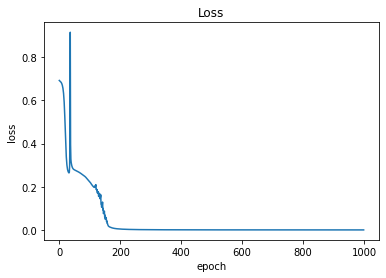

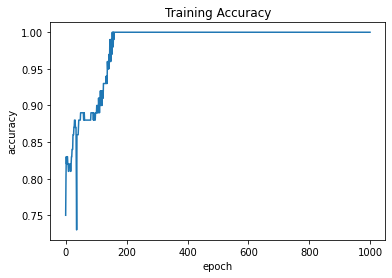

In [10]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

nn = FullyConnectedNetwork(architecture)

n_samples = 100
x,y = make_moons(n_samples=n_samples)
y = np.expand_dims(y, axis=-1)

losses, accuracies = nn.train(x, y_true=y, epoch=1000, learning_rate=0.1)

plt.title("Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(losses)
plt.show()
plt.title("Training Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(accuracies)
plt.show()


## Convolutional Layers

In [11]:
# Implement a function that applies a filter to input image
import numpy as np
from skimage.io import imread


def convolve_filter(image, filter):
  # Apply filter to image
  # Image will be a grayscale image and filter will be of shape (m x n)

  ### Solution ###
  output_shape = (image.shape[0]-filter.shape[0]+1, image.shape[1]-filter.shape[1]+1)
  output_image = np.zeros(output_shape)
  for y in range(output_shape[0]):
    for x in range(output_shape[1]):
      output_image[y,x] = np.sum(filter * image[y:y + filter.shape[0],x:x+filter.shape[1]])

  ################
  return output_image



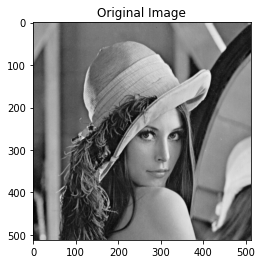

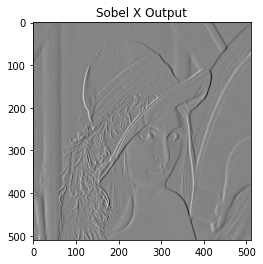

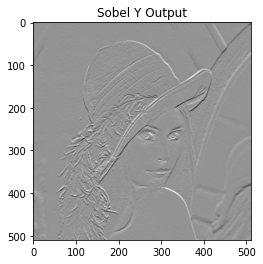

In [12]:
# We will apply sobel filter to a grayscale image using the convolve_filter function you implemented above
# Sobel filter, is used in image processing, particularly within edge detection algorithms where it creates an image emphasising edges
import matplotlib.pyplot as plt

sobel_filter_x = np.array([[-1,0,1],
                         [-2,0,2],
                         [-1,0,1]])

sobel_filter_y = np.array([[-1,-2,-1],
                         [0,0,0],
                         [1,2,1]])

lena_grayscale = imread("https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/lena_gray.gif")
plt.imshow(lena_grayscale, cmap='gray')
plt.title("Original Image")
plt.show()
output_x = convolve_filter(lena_grayscale, sobel_filter_x)
output_y = convolve_filter(lena_grayscale, sobel_filter_y)
plt.title("Sobel X Output")
plt.imshow(output_x, cmap='gray')
plt.show()
plt.title("Sobel Y Output")
plt.imshow(output_y, cmap='gray')
plt.show()

#Q4: Naive Bayes Classifier

Naive Bayes classifier is a simple probabilistic classifier based on applying Bayes' theorem with strong (naive) independence assumptions between the features. We will use a Gaussian Naive Bayes classifier because when dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution.

We will basically frame the classification problem with Bayes theorem as follows:

$P(y_i \vert x_1, x_2, \dots , x_n) = \frac{P(x_1, x_2, \dots, x_n \vert y_i) * P(y_i)}{P(x1, x2, …, xn)}$

(To make calculations a little straightforward, we will ignore the denominator part since it will be the same for all of the inputs)

We will follow these steps:
1. Separate Instances By Class
2. Summarize Data By Class
3. Gaussian Probability Density Function
4. Make Predictions
5. Create New Instances For Each Class 







### Separate Instances By Class

In [13]:
import numpy as np

def separate_data_by_class(x, y):
    # Get Unique class labels
    classes = np.unique(y)
    # Populate class instances dictionary with (class_label : class_instance_list)
    class_instances = {}
    for c in classes:
        class_instances[c] = []
    for x_i, y_i in zip(x,y):
        class_instances[y_i].append(x_i)
    return class_instances

### Summarize Data By Class

We need mean and variance for each column of the input instances to calculate Gaussian Probability Density Function

In [14]:
def mean(x):
    # Implement a function to calculate mean for each feature
    # Hint: you can use numpy mean function with "axis" parameter

    ### Solution ###
    return np.mean(x, axis=0)
    ################

def standart_deviation(x):
    # Implement a function to calculate standart deviation for each feature

    ### Solution ###
    avg = mean(x)
    variance = np.sum((x-avg)**2, axis=0) / (len(x)-1)
    return np.sqrt(variance)
    ################

def calculate_class_summary(class_instances):
    class_summary = {}
    # Calculate mean and variance for each class
    for c, feature in class_instances.items():
        ### Solution ###  
        class_summary[c] = {"mean": mean(feature),
                            "std_dev":standart_deviation(feature)}
        ################
    return class_summary

### Gaussian Probability Density Function

We will implement function to calculate a Gaussian Probability Density function

$g(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp(-\frac{(x - \mu)^2}{2\sigma^2})$

In [15]:
def gaussian_probability_density(x, mean, std_dev):
  ### Solution ###
  first_term = 1 / (np.sqrt(2 * np.pi) * std_dev)
  second_term = np.exp(-np.square((x - mean))/ (2*np.square(std_dev)))
  return np.prod(first_term * second_term, axis=1)
  ################



In [16]:
def predict(x, summaries):
  # Calculate probabilities for each class and make predictions using the max probability value for each instance

  ### Solution ###
  probabilities = np.stack([gaussian_probability_density(x, summary["mean"], summary["std_dev"]) for c, summary in summaries.items()], axis=1)
  
  return np.argmax(probabilities, axis=-1)
  ################

def accuracy(y_pred, y_true):
  # Calculate classification accuracy 
  
  ### Solution ###
  return np.mean(np.equal(y_pred, y_true))
  ################
  

Test the implementations

In [17]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
x, y = make_blobs(n_samples=500, centers=2, n_features=2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

class_instances = separate_data_by_class(x_train, y_train)
class_summary = calculate_class_summary(class_instances)
predictions = predict(x_test, class_summary)
print(accuracy(predictions, y_test))




1.0


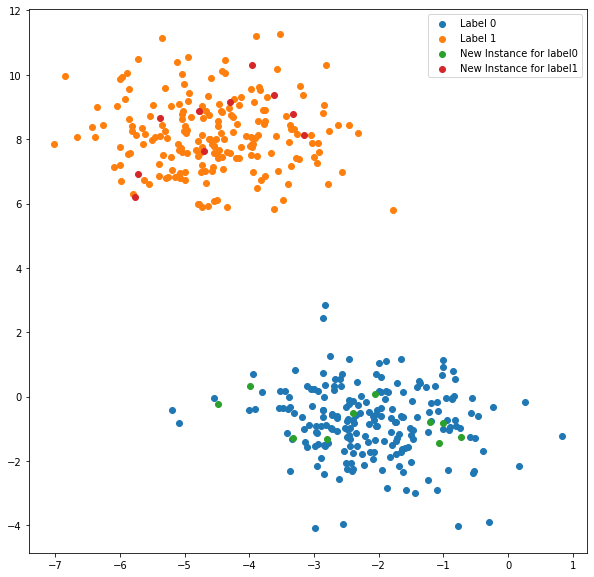

In [18]:
## Since we know (or we assume that we know) class distributions we can sample new instances for each class
## A nice example for a generative model

#Create 10 new instance from the summaries calculated above
new_class_instances = {}
for c, summary in class_summary.items():
  #Hint: Use np.random.normal
  ### Solution ###
  new_class_instances[c] =  np.random.normal(class_summary[c]["mean"], class_summary[c]["std_dev"], size=(10,2))
  ################

plt.figure(figsize=(10,10))
for c, instances in class_instances.items():
  instances = np.array(instances)
  plt.scatter(instances[:,0], instances[:,1], label=f"Label {c}")
for c, instances in new_class_instances.items():
  instances = np.array(instances)
  plt.scatter(instances[:,0], instances[:,1], label=f"New Instance for label{c}")

plt.legend()
plt.show()
